<a href="https://colab.research.google.com/github/Ibtisam-a/Project-Implementation/blob/master/Coding_Project_chickpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 

***Solving using scipy.linalg solve_sylvester*** 

We find Numerical solution of our problem with the help of programming in python

The spatial domain of the Heat equation is: $\mathcal{D} = \{(x, y) : 0\le x\le 1, 0\le y\le 1\ \text{on} \ [0,T]\}$ and let  $u : \mathcal{D}\rightarrow\mathbb{R}$ is the solution of that PDE, so $u = 0$ on the boundary, $u = u_{0} \ \text {at} \ t = 0.$
Our two-dimensional Heat equation taking into account the Laplacian equation will be:

\begin{equation*}
u_{t} - u_{xx}- u_{yy} = f \text{on}\  \mathcal{D}
\end{equation*}

we have to find the unknown $U$ and we have $A,B$ and $C$.

Where $C$ is The Initial data and we get $C$ with the help of programming.

Total number of nodes in each direction(N=1520)

Error:  1.1995710586907386e-08
The time for the exact solution:  0.0966196060180664 
 The time for the computed solution:  0.09524083137512207 
 The total time : 28.72347855567932


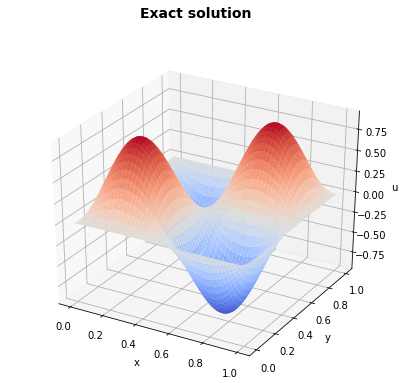

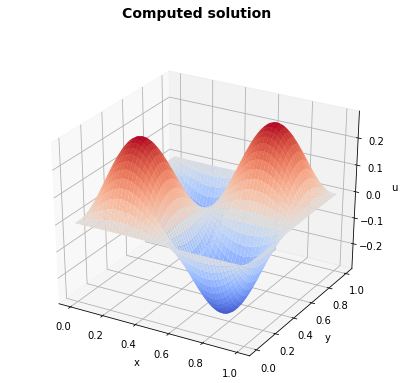

In [22]:
import numpy as np
from scipy.sparse import diags
from scipy.linalg import solve_sylvester #computes solution to AX + XB = C
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time



#Define parameters
#total number of nodes in each direction
N = 1519# our values: 190, 380, 760, 1520, 3040, 6080 and 12160 

n = N-1 #number of internal nodes in each direction (unknowns)
h = 1/(N) #step size                                          

#Define x and y as arrays between 0 and 1
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

start_time = time.time()
#Compute exact solution for comparison
Exact_sol =np.exp(-8*(np.pi*np.pi)*(0.001))*np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)  # at time step t= 0.1
exact_time = time.time() - start_time

#Compute C from the initial data
C=np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)
computed_time = time.time() - exact_time - start_time


#Define tridiagonal matrix T
diagonals = [[1.5],[1],[1]]
A = np.multiply(0.5, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
                
#Solve system
U = solve_sylvester(A, A, C)

#Plot actual solution
plt.figure(0, figsize=(7.0, 6.0))
plt.suptitle('Exact solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
surf = ax.plot_surface(X, Y, Exact_sol, cmap='coolwarm', edgecolor='none')


#Plot computed solution
plt.figure(1, figsize=(7.0, 6.0))
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
surf = ax.plot_surface(X, Y, U, cmap='coolwarm', edgecolor='none')


#Compare solution against C and calculate error
C_computed = np.reshape(np.matmul(A,U) + np.matmul(U,A),-1)
C = np.reshape(C,-1)
error = 0
for i in range(0,n**2):
    error += np.absolute(C[i]-C_computed[i])
print("Error: ", error)

end_time = time.time()
solve_time = end_time - computed_time - exact_time - start_time
total_time = end_time - start_time
print("The time for the exact solution: ", exact_time,  '\n', "The time for the computed solution: ",  computed_time,  '\n',
      "The total time :", total_time)

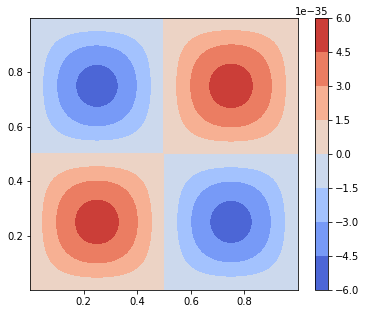

In [16]:
fig = plt.figure(figsize=(6,5))
cp=plt.contourf(X, Y, U_exact, cmap='coolwarm')
plt.colorbar(cp)

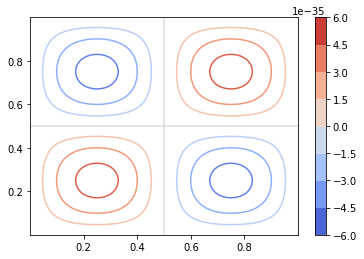

In [17]:
plt.contour(X, Y, U_exact, cmap='coolwarm')
plt.colorbar(cp)

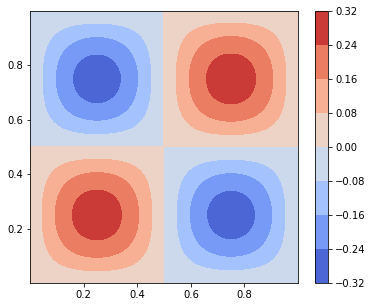

In [18]:
fig = plt.figure(figsize=(6,5))
cp=plt.contourf(X, Y, U, cmap='coolwarm')
plt.colorbar(cp);

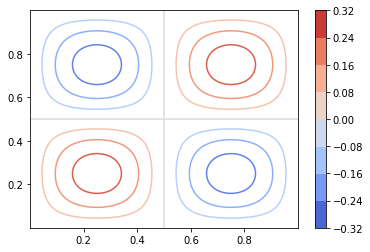

In [19]:
plt.contour(X, Y, U, cmap='coolwarm')
plt.colorbar(cp)


# **Direct Methods**

#**First**: Applying Similarity Transformations on our computed solution

Matrices are the same
Error:  2.194510982763907e-08
The time for the computed solution:  0.10322189331054688 
 The time for the solution calculating : 71.48858046531677 
 The total time : 77.04699301719666


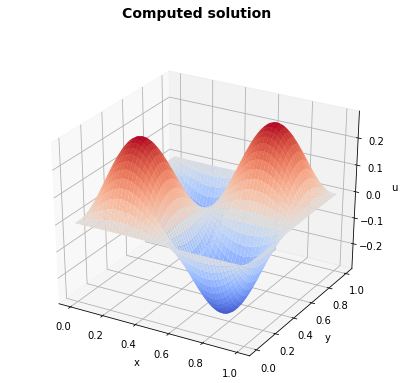

In [23]:
import numpy as np
from scipy.sparse import diags
from scipy.linalg import solve_sylvester #computes solution to AX + XB = Q
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time



#Define parameters
N = 1519 #total number of nodes in each direction
n = N-1 #number of internal nodes in each direction (unknowns)
h = 1/(N) #step size                                          

#Define x and y as arrays between 0 and 1 
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

start_time = time.time()

#Compute C from the initial data
C=np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)
computed_time = time.time() - start_time


#Define tridiagonal matrix A
diagonals = [[1.5],[1],[1]]
A = np.multiply(0.5, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

#Get eigenvalues and eigenvectors of A
eig_values, eig_vectors = np.linalg.eig(A)

#Set eigenvalues as diagonal matrix
diag = diags(eig_values, 0, shape=(n, n)).toarray()

#Set basis matrix M, with columns as the eigenvectors
P = eig_vectors


#Check to see if M^-1 * A * M == diag
P_computed = np.matmul(np.matmul(np.linalg.inv(P),A),P)

equivalent = True
for i in range(0,n):
    for j in range(0,n):
        if(np.absolute(diag[i][j]-P_computed[i][j])>00.1):
            equivalent = False
if (equivalent==True):
    print('Matrices are the same')


#Define C_hat = P^-1 * C * P
C_hat = np.matmul(np.matmul(np.linalg.inv(P),C),P)

#Calculate U_hat, u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
U_hat = np.empty([n,n])
for i in range(0,n):
    for j in range(0,n):
        if (eig_values[i]!=0 or eig_values[j]!=0):
            U_hat[i][j] = C_hat[i][j] / (eig_values[i]+eig_values[j])
        else:
            U_hat[i][j] = 0
        
#Calculate solution U = M * U^hat * M^-1
U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P))
calSolution_time = time.time() - computed_time - start_time

#Plot computed solution
plt.figure(1, figsize=(7.0, 6.0))
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
surf = ax.plot_surface(X, Y, U, cmap='coolwarm', edgecolor='none')


#Compare solution against C and calculate error
C_computed = np.reshape(np.matmul(A,U) + np.matmul(U,A),-1)
C = np.reshape(C,-1)
error = 0
for i in range(0,n**2):
    error += np.absolute(C[i]-C_computed[i])
print("Error: ", error)

end_time = time.time()
solve_time = end_time - calSolution_time - computed_time - start_time
total_time = end_time - start_time
print( "The time for the computed solution: ",  computed_time,  '\n', "The time for the solution calculating :", calSolution_time,
      '\n', "The total time :", total_time)


#**Second**: using Bartels-Stewart Algorithm on our computed solution

Error:  2.194510982763907e-08
The time for the computed solution:  0.11578536033630371 
 The time for the solution calculating : 71.48858046531677 
 The total time : 11.65971064567566


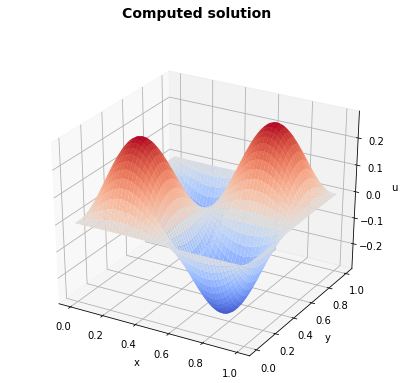

In [24]:
import numpy as np
from scipy.sparse import diags
from scipy.linalg import schur
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time



#Define parameters
N = 1519 #total number of nodes in each direction
n = N-1 #number of internal nodes in each direction (unknowns)
h = 1/(N) #step size                                          

#Define x and y as arrays between 0 and 1 
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

start_time = time.time()

#Compute C from the initial data
C=np.sin(2*np.pi*X)*np.sin(2*np.pi*Y)
computed_time = time.time() - start_time


#Define tridiagonal matrix A
diagonals = [[1.5],[1],[1]]
A = np.multiply(0.5, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

                
#Compute Schur decomposition
R, P = schur(A)

#Solve R^*V + VR = P^*FP for V
V = np.empty([n,n])
RHS = np.multiply(np.multiply(P.transpose(),C),P)

#Plot computed solution
plt.figure(1, figsize=(7.0, 6.0))
plt.suptitle('Computed solution', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
surf = ax.plot_surface(X, Y, U, cmap='coolwarm', edgecolor='none')


#Compare solution against C and calculate error
C_computed = np.reshape(np.matmul(A,U) + np.matmul(U,A),-1)
C = np.reshape(C,-1)
error = 0
for i in range(0,n**2):
    error += np.absolute(C[i]-C_computed[i])
print("Error: ", error)

end_time = time.time()
solve_time = end_time - calSolution_time - computed_time - start_time
total_time = end_time - start_time
print( "The time for the computed solution: ",  computed_time,  '\n', "The time for the solution calculating :", calSolution_time,
      '\n', "The total time :", total_time)